# Introduction

The aim of this notebook is to predict the prices of stainless-steel using a csv file.

# Data

In [67]:
# import all packages needed in this notebook

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library 
import os

In [34]:
data_path = os.path.abspath("Stainless_Steel_Price.csv") # find the absolute path for the file
steel_df = pd.read_csv(data_path) # load the data and assign to a variable

# Exploratory Data Analysis

This section is dedicated to describe, visualize and explore the dataset

In [52]:
steel_df.shape # show number of rows and columns respectively 

(84, 20)

In [49]:
steel_df.head() # show top 5 rows

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,07/01/2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64
1,08/01/2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25
2,09/01/2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003,99.27196,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27
3,10/01/2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.5771,101.1835,100.02300,100.6666,56.2,7203.02
4,11/01/2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65


In [36]:
steel_df.info() # summary dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

In [48]:
steel_df.describe() # descriptive stats 

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


In [44]:
pd.isnull(steel_df).sum() # verify if null values are present

Date                        0
StainlessSteelPrice         0
Steel_Inventory_M_USD       0
Steel_Orders_M_USD          0
IronOre_Global_USD          0
CoalAustralia_Global_USD    0
Energy_Index                0
Nickel_Global_USD           0
Zinc_Global_USD             0
Freight_Transport_Index     0
WTI_Crude_Global_USD        0
Baltic_Dry_Index            0
BCI_China                   0
BCI_Europe                  0
BCI_US                      0
CLI_China                   0
CLI_Europe                  0
CLI_US                      0
PMI_US_Manufacturing        0
Copper_Global_USD           0
dtype: int64

In [59]:
steel_df["Date"].nunique() # check if date values are unique

84

In [70]:
steel_df.corr()

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
StainlessSteelPrice,1.000000,0.664614,0.740649,0.309481,0.342556,0.462810,0.778973,0.362059,-0.016143,0.456958,0.412468,0.062889,0.014029,0.328395,-0.163732,-0.012130,0.300326,0.347954,0.598440
Steel_Inventory_M_USD,0.664614,1.000000,0.760189,0.353206,0.159972,0.581087,0.705316,0.003550,-0.032706,0.527164,0.203553,-0.099697,-0.045462,0.252138,-0.040679,-0.032386,0.372684,0.343041,0.619501
Steel_Orders_M_USD,0.740649,0.760189,1.000000,0.573966,0.528441,0.786776,0.728855,0.315629,0.186181,0.758527,0.482688,0.149460,0.192865,0.562642,0.059071,0.161075,0.530813,0.557737,0.842820
IronOre_Global_USD,0.309481,0.353206,0.573966,1.000000,0.118358,0.661525,0.522404,-0.085498,0.019960,0.691490,0.493267,0.031639,-0.304422,0.046199,0.024810,-0.207918,0.067105,0.028115,0.616226
CoalAustralia_Global_USD,0.342556,0.159972,0.528441,0.118358,1.000000,0.315114,0.075890,0.754062,0.152220,0.247777,0.428152,0.440667,0.568913,0.779204,0.178261,0.333741,0.418978,0.723470,0.518663
Energy_Index,0.462810,0.581087,0.786776,0.661525,0.315114,1.000000,0.687258,0.008813,0.183515,0.988651,0.411130,0.305696,0.253880,0.516230,0.338880,0.307622,0.651029,0.484448,0.828471
Nickel_Global_USD,0.778973,0.705316,0.728855,0.522404,0.075890,0.687258,1.000000,0.046405,0.001683,0.701645,0.356033,0.056290,-0.101674,0.181259,-0.024070,-0.024932,0.329915,0.195807,0.669253
Zinc_Global_USD,0.362059,0.003550,0.315629,-0.085498,0.754062,0.008813,0.046405,1.000000,0.180817,-0.028286,0.287636,0.417819,0.561637,0.666633,0.135068,0.354551,0.280415,0.603068,0.418898
Freight_Transport_Index,-0.016143,-0.032706,0.186181,0.019960,0.152220,0.183515,0.001683,0.180817,1.000000,0.191164,0.169795,0.230816,0.341689,0.346769,0.274938,0.469253,0.401733,0.188743,0.183843
WTI_Crude_Global_USD,0.456958,0.527164,0.758527,0.691490,0.247777,0.988651,0.701645,-0.028286,0.191164,1.000000,0.410563,0.276146,0.199862,0.450690,0.312941,0.282788,0.613729,0.408011,0.795886


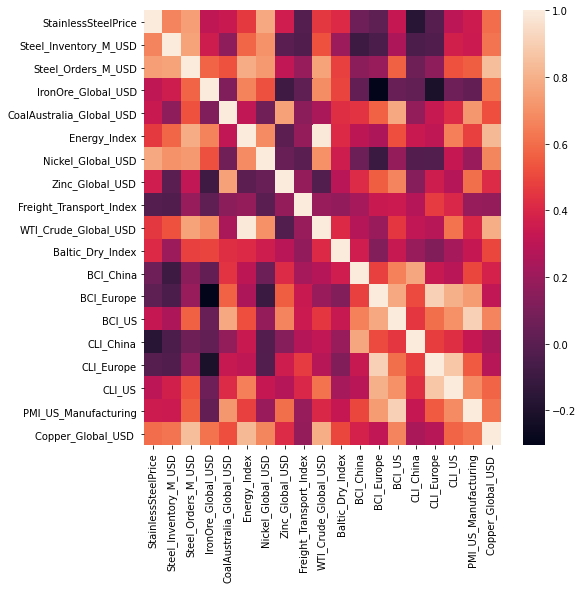

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(steel_df.corr());

# Modelling

## Statistical Models

## Machine Learning Model

## Deep Learning Model

# Evaluate Model Performance

- use mape as score
- directional symmetry (smape)

# Model Tuning

## Hyper-Parameters

## Feature Selection